In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
#import data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df['latitude'].value_counts()

latitude
34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: count, Length: 862, dtype: int64

In [6]:
#create lists of data values from data frame
long = df['longitude'].tolist()
medV = df['median_house_value'].tolist()
lat = df['latitude'].tolist()
lat

[37.88,
 37.86,
 37.85,
 37.85,
 37.85,
 37.85,
 37.84,
 37.84,
 37.84,
 37.84,
 37.85,
 37.85,
 37.85,
 37.84,
 37.85,
 37.85,
 37.85,
 37.85,
 37.84,
 37.84,
 37.85,
 37.85,
 37.84,
 37.84,
 37.84,
 37.85,
 37.85,
 37.85,
 37.84,
 37.84,
 37.84,
 37.84,
 37.84,
 37.83,
 37.83,
 37.83,
 37.83,
 37.83,
 37.83,
 37.83,
 37.83,
 37.83,
 37.84,
 37.84,
 37.83,
 37.83,
 37.83,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.83,
 37.82,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.8,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.8,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.8,
 37.8,
 37.8,
 37.8,
 37.8,
 37.79,
 37.8,
 37.8,
 37.82,
 37.81,
 37.82,
 37.82,
 37.81,
 37.81,
 37.81,
 37.81,
 37.81,
 37.82,
 37.81,
 37.81,
 37.82,
 37.82,
 37.82,
 37.82,
 37.82,
 37.83,
 37.83,
 37.83,
 37.83,
 37.83,
 37.84,
 37.84,
 37.83,
 37.85,
 37.85,
 37.84,
 37.85,
 37.85,
 

In [7]:
#scatterplot 
colors = ['blue', 'green', 'red']

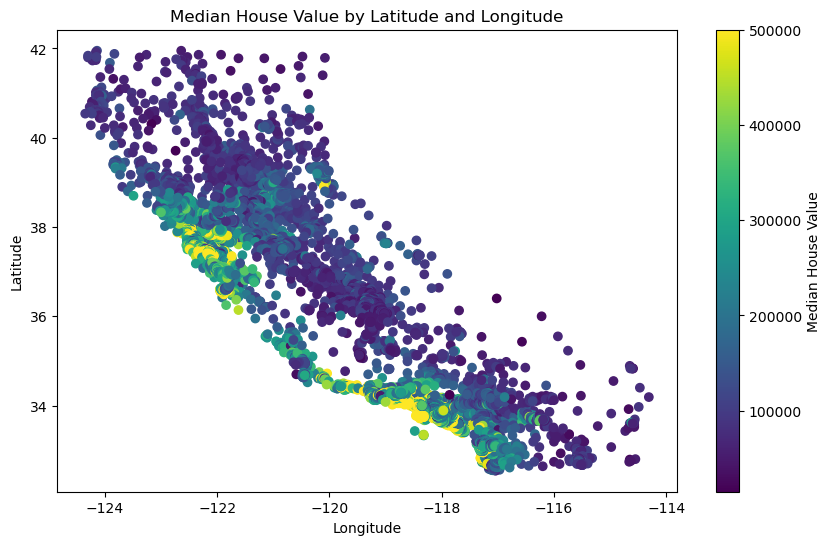

In [8]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis')
colorbar = plt.colorbar(scatter)
colorbar.set_label('Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median House Value by Latitude and Longitude')
plt.show()

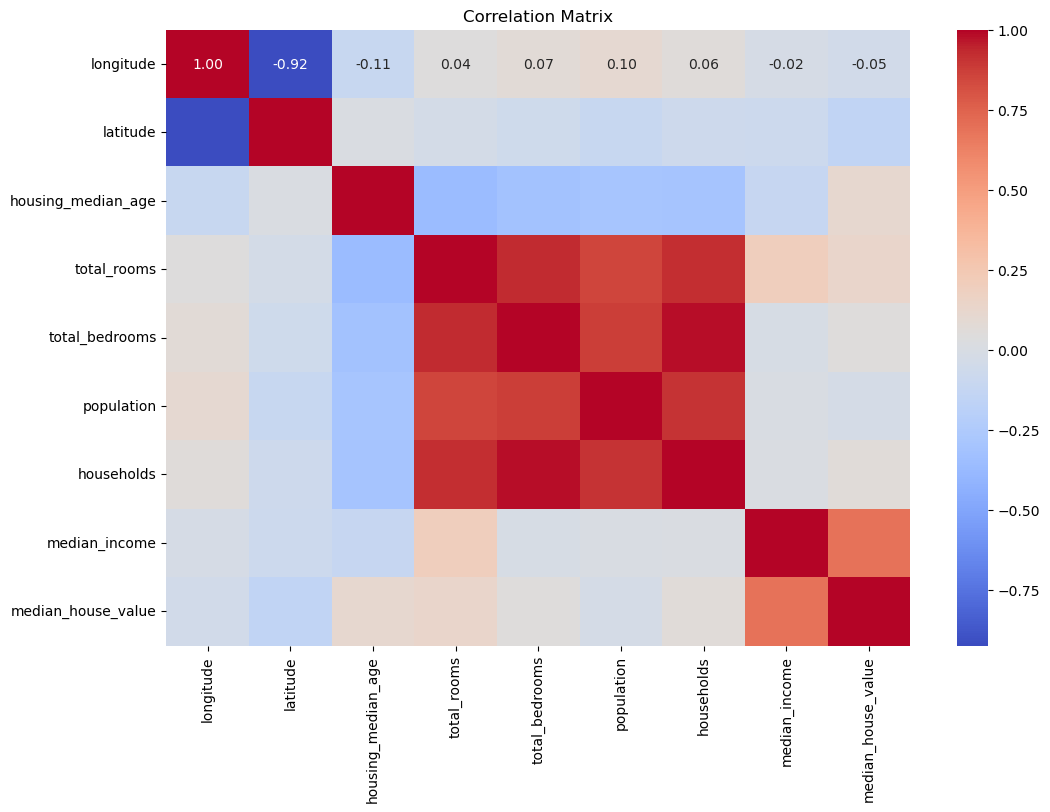

In [9]:
#correlation matrix 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

temp_df = df.copy()
temp_df = temp_df.drop(columns=['ocean_proximity'])
correlation_matrix = temp_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
#one hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df['median_house_value'].value_counts()
df['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
one_hot = OneHotEncoder()
transformed_data = one_hot.fit_transform(df['ocean_proximity'].values.reshape(-1,1)).toarray()
one_hot.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [12]:
transformed_data = pd.DataFrame(transformed_data, columns = ['<1H OCEAN',
'INLAND', 
'NEAR OCEAN', 
'NEAR BAY',
'ISLAND'])
transformed_data.head()

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [13]:
transformed_data.iloc[90, ]

<1H OCEAN     0.0
INLAND        0.0
NEAR OCEAN    0.0
NEAR BAY      1.0
ISLAND        0.0
Name: 90, dtype: float64

In [14]:
df['median_house_value'][90]

162500.0

In [15]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [16]:
#removing any null vals
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
agent_col = imputer.fit_transform(df['total_bedrooms'].values.reshape(-1,1))
pd.DataFrame(agent_col).isnull().sum()

0    0
dtype: int64

In [17]:
df['total_bedrooms'].isnull().sum()

207

In [18]:
#normalizing data using minmaxscalar
temp_data = df.select_dtypes(include='number') #numeric columns is defined as the whole dataset
temp_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [19]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
normalizer = MinMaxScaler()
temp_data.dropna(axis = 1, inplace = True)
normalized_data = normalizer.fit_transform(temp_data)
pd.DataFrame(normalized_data, columns = temp_data.columns)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.015752,0.042427,0.230776,0.674638
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.020684,0.057227,0.094295,0.143713


In [20]:
#model training and testing 70-30 split
# train - 70
# test - 30
X = temp_data.drop(columns = ['median_house_value'])
Y = temp_data['median_house_value']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [21]:
#cross validation using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Initialize KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Define models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

def cross_validation(model, X, Y, kf):
    scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')
    print(f"Cross-Validation MSE for {model.__class__.__name__}: {np.mean(-scores)}")
    

In [22]:
lr1 = LinearRegression()
dt2 = DecisionTreeRegressor()
rf3 = RandomForestRegressor()
lr1 = cross_validation(lr, X, Y, kf)
dt2 = cross_validation(dt, X, Y, kf)
rf3 = cross_validation(rf, X, Y, kf)

Cross-Validation MSE for LinearRegression: 4914968503.5896635
Cross-Validation MSE for DecisionTreeRegressor: 4594097878.664487
Cross-Validation MSE for RandomForestRegressor: 2345104147.3676963


In [23]:
lr1.fit(x_train, y_train)
print("Accuracy: ", lr1.score(x_test, y_test) * 100)

AttributeError: 'NoneType' object has no attribute 'fit'

In [ ]:
dt2.fit(x_train, y_train)
print("Accuracy: ", dt2.score(x_test, y_test) * 100)

In [ ]:
rf3.fit(x_train, y_train)
print("Accuracy: ", rf3.score(x_test, y_test) * 100)

In [ ]:
# #Paragraph Summary
# I learned about cross-validation and how different models interact with cross-validation. 
# I created a function to handle any model to pass into and found it interesting that each output had a different runtime. 
# There are numerous ways to perform the same cross-validation on a dataset. The dataset must first be normalized before cross-validation
# meaning there must be no null values as well as no string values as strings cannot be cast into float data types. I noticed from the 
# scatterplot that the most expensive houses were densely populated on the coast of California while the cheaper houses were located more
# sparsely in central California. Due to the scatterplot being colored by numeric values and not strings, the scatter plot’s color was set
# by a color bar and not set with the corresponding points in the loop. This project will correlate to the cross-evaluation of the GIS datasets
# and due to this, it will be easier once we start that process.